#001

In [1]:
import numpy as np
import pandas as pd
path = u"./dataset/002.srt"
x = pd.read_csv(path, sep='\n')
y = np.array(x)

z = []
z.append(np.array(['1']))
for i in y:
    z.append(i)

for i in z:
    print(i)

s = ""
idx = 0
subPack = []
pack = []
for i in z:
    subPack.append(i[0])
    idx += 1
    if(idx % 3 == 0):
        pack.append(subPack)
        subPack = []
        idx = 0

start = []
end = []
for i in range(len(pack)):
    s = pack[i][1]
    s = s.replace(" --> ", "")
    s = s[0:8], s[12:20]
    a = list(s)
    pack[i][1] = a


['1']
['00:00:00,160 --> 00:00:02,510']
['核能發電到底是不是一個安全的技術呢']
['2']
['00:00:02,520 --> 00:00:03,470']
['在核災之後']
['3']
['00:00:03,480 --> 00:00:05,710']
['世界各國的核電發展又是如何呢']
['4']
['00:00:05,750 --> 00:00:07,510']
['廢核是國際趨勢嗎']
['5']
['00:00:07,610 --> 00:00:12,250']
['今天我們透過重啟核四公投來聊聊核電究竟安不安全嗎']
['6']
['00:00:23,550 --> 00:00:24,200']
['hello  大家好']
['7']
['00:00:24,210 --> 00:00:26,120']
['我是自己換回到2021公投']
['8']
['00:00:26,130 --> 00:00:26,530']
['只能哦']
['9']
['00:00:26,540 --> 00:00:27,940']
['這是這個系列的第4集']
['10']
['00:00:27,970 --> 00:00:31,000']
['那我們在前幾天已經談過公投要不要綁大選']
['11']
['00:00:31,010 --> 00:00:33,500']
['藻礁公投還有萊豬公投的3個議題']
['12']
['00:00:33,530 --> 00:00:34,800']
['那如果你還沒看完']
['13']
['00:00:34,830 --> 00:00:36,760']
['歡迎你有看完今天的影片之後呢']
['14']
['00:00:36,770 --> 00:00:38,920']
['回去看一看那今天這一集是第4集']
['15']
['00:00:38,930 --> 00:00:39,690']
['我們要來討論的']
['16']
['00:00:39,700 --> 00:00:41,880']
['是第十七案重啟核四公投']
['17']
['00:00:41,910 --> 00:00:44,820']
['不過我們發現這個議題比想像中還要複雜很多']
['18']
['00:00

In [2]:
import jieba
import jieba.analyse
import numpy as np
from bert4keras.models import build_transformer_model
from bert4keras.tokenizers import Tokenizer
from bert4keras.snippets import to_array


config_path = "./model/bert_base/chinese_L-12_H-768_A-12/bert_config.json"
checkpoint_path = './model/bert_base/chinese_L-12_H-768_A-12/bert_model.ckpt'
dict_path = './model/bert_base/chinese_L-12_H-768_A-12/vocab.txt'

model = build_transformer_model(
    config_path=config_path, checkpoint_path=checkpoint_path, with_nsp=True
)
tokenizer = Tokenizer(dict_path, do_lower_case=True)

token = []
seg = []
token_ids = ""
segment_ids = ""
result = []

for i in range(len(pack)-1):
    if (len(pack[i][2])+len(pack[i+1][2]) >= 512):
        pack[i][2] = pack[i][2][-128:]

    token_ids, segment_ids = tokenizer.encode(
        pack[i][2], pack[i+1][2])

    token_ids, segment_ids = to_array([token_ids], [segment_ids])

    probas = model.predict([token_ids, segment_ids])[0]
    # print(probas)
    result.append(probas)

# token_ids = np.array([[token_ids]])
# segment_ids = np.array([[segment_ids]])
# token_ids = token_ids.reshape(1,  1, -1)
# segment_ids = segment_ids.reshape(1,  1, -1)
# probas = model.predict([token_ids, segment_ids])[0]

for i in range(len(pack)-1):
    pack[i].append(result[i][0])

idxList = []
lessThanHalf = []
lessThanHalf.append('00:00:00')
for i in range(len(pack)-1):
    if(pack[i][3] < 0.2):
        idxList.append(i)
        lessThanHalf.append(pack[i][1][1])

combineText = []
j = ''
j = pack[0][2]
for i in range(len(pack)-1):
    token_testId, Seg_testId = tokenizer.encode(pack[i][2], pack[i+1][2])
    token_testId, Seg_testId = to_array([token_testId], [Seg_testId])
    result = model.predict([token_testId, Seg_testId])[0][0]

    # if len(j)==0:
    #     j=pack[i][2]

    #     if (result>=0.5):
    #         j+=pack[i+1][2]
    #     else:
    #         combineText.append(j)
    #         j=""

    #     if (i==len(pack)-2):
    #         print(0)
    #         if len(j)!=0:
    #             combineText.append(j)
    #         else:
    #             combineText.append(pack[i+1][2])

    # print(i,result,j)
    if(result > 0.5):
        j += pack[i+1][2]
        if(i == len(pack)-2):
            j = pack[i+1][2]
            combineText.append(j)
            j = ""
    else:
        j += pack[i+1][2]

        combineText.append(j)
        j = ""


In [3]:
aa = ""
bb = []
for i in range(len(pack)-1):
    # print(pack[i][-1])

    if len(aa) == 0:
        aa = pack[i][2]

    if (pack[i][-1] >= 0.5):
        aa += pack[i+1][2]
    else:
        bb.append(aa)
        aa = ""

    if (i == len(pack)-2):
        # print(0)
        if len(aa) != 0:
            bb.append(aa)
        else:
            bb.append(pack[i+1][2])
combineText = bb


In [9]:
wst = []
for sentence in combineText:
    seq_list = jieba.lcut(sentence)
    wst.append(seq_list)

TF = np.zeros((np.shape(wst)[0], 20))

combineStr = "".join(combineText)


Query = jieba.analyse.extract_tags(
    combineStr, topK=20, withWeight=False, allowPOS=('n'))

for i in range(len(Query)):
    for j in range(len(wst)):
        for k in range(len(wst[j])):
            if(Query[i] == wst[j][k]):
                TF[j][i] = 1
                continue
# print(TF)
keyWord = []
deliver = []
for i in TF:
    for j in range(len(i)):
        if(i[j]):
            deliver.append(Query[j])
    keyWord.append(deliver)
    deliver = []

finalResult = []
tmpProcess = []
for i in range(len(combineText)):
    tmpProcess.append(lessThanHalf[i])
    # tmpProcess.append(lessThanHalf[i+1])
    tmpProcess.append(combineText[i])
    tmpProcess.append(keyWord[i])
    finalResult.append(tmpProcess)
    tmpProcess = []


In [5]:
pack


[['1', ['00:00:00', '00:00:02'], '核能發電到底是不是一個安全的技術呢', 0.9996556],
 ['2', ['00:00:02', '00:00:03'], '在核災之後', 0.99921393],
 ['3', ['00:00:03', '00:00:05'], '世界各國的核電發展又是如何呢', 0.99996066],
 ['4', ['00:00:05', '00:00:07'], '廢核是國際趨勢嗎', 0.99998975],
 ['5', ['00:00:07', '00:00:12'], '今天我們透過重啟核四公投來聊聊核電究竟安不安全嗎', 0.85393566],
 ['6', ['00:00:23', '00:00:24'], 'hello  大家好', 0.9546738],
 ['7', ['00:00:24', '00:00:26'], '我是自己換回到2021公投', 0.8754484],
 ['8', ['00:00:26', '00:00:26'], '只能哦', 0.020911878],
 ['9', ['00:00:26', '00:00:27'], '這是這個系列的第4集', 0.0035948711],
 ['10', ['00:00:27', '00:00:31'], '那我們在前幾天已經談過公投要不要綁大選', 0.99997723],
 ['11', ['00:00:31', '00:00:33'], '藻礁公投還有萊豬公投的3個議題', 0.8936845],
 ['12', ['00:00:33', '00:00:34'], '那如果你還沒看完', 0.9997948],
 ['13', ['00:00:34', '00:00:36'], '歡迎你有看完今天的影片之後呢', 0.9997594],
 ['14', ['00:00:36', '00:00:38'], '回去看一看那今天這一集是第4集', 0.99884474],
 ['15', ['00:00:38', '00:00:39'], '我們要來討論的', 0.996185],
 ['16', ['00:00:39', '00:00:41'], '是第十七案重啟核四公投', 0.19087882],
 ['17

In [10]:
finalResult


[['00:00:00',
  '核能發電到底是不是一個安全的技術呢在核災之後世界各國的核電發展又是如何呢廢核是國際趨勢嗎今天我們透過重啟核四公投來聊聊核電究竟安不安全嗎hello  大家好我是自己換回到2021公投只能哦',
  ['核能', '趨勢', '核災', '核電', '國際', '大家']],
 ['00:00:26', '這是這個系列的第4集', []],
 ['00:00:27',
  '那我們在前幾天已經談過公投要不要綁大選藻礁公投還有萊豬公投的3個議題那如果你還沒看完歡迎你有看完今天的影片之後呢回去看一看那今天這一集是第4集我們要來討論的是第十七案重啟核四公投',
  ['議題', '影片']],
 ['00:00:41', '不過我們發現這個議題比想像中還要複雜很多我們必須要先弄清楚許多關於核能', ['核能', '議題']],
 ['00:00:47',
  '還有盒子的資訊才有辦法進入後續的討論所以這個主題呢我們會切分成上下兩集今天這一集我們會先來跟大家介紹核電廠揪竟安全過去的核災是怎麼回事也會聊到國際合的趨勢以及臺灣的核能發展現況那明天我們就會正式進入這一次核四公投的正反意見討論  當然照慣例哦在開始之前呢還是要先進一段工商服務時間',
  ['核能', '趨勢', '核電廠', '核災', '大家']],
 ['00:01:10',
  '臺灣第一場專門為youtube影音創作者舉辦年會fip即將登場嘍不然你是剛踏入youtube圈還再努力殺出重圍或者是已經有點成果正在思考變現或其他問題的創作者這場年會都會幫助你突破困境明確的知道下一步要怎麼走',
  ['影音', '作者']],
 ['00:01:26',
  '這種年會由臺灣新媒體影音創作者協會主辦喔串聯了多位頂尖創作者一起分享他們在內容策略個人發展影音趨勢以及商業洞察的經驗和觀點',
  ['趨勢', '影音', '作者', '協會', '內容']],
 ['00:01:36',
  '除此之外呢協會還邀請到youtube官方代表和ip為大家提供最準確的平臺動向和建議那如果你還沒創作者但正在準備入行或者是有興趣了解當然也能參加  而像年會呢將在2022年的1月10日登場除了現場席位呢也有線上影片票可以讓大家遠端參與目前優惠票種自然熱烈的範疇當中那因為數量有限所以有幸確認請點擊下

In [91]:
TF


array([[0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [115]:
def Euclidean_Distance(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))


In [116]:
Euclidean_Distance(TF[0], TF[1])


2.449489742783178

In [1]:
Paragraph = ['董橋的舅舅開書店，代理商務印書館的書，父親在書店兼職，是書香世家。父親很重視教育，董橋從小就學習英文與鋼琴，並在父親的書房中讀遍線裝書與明清筆記，喜歡看《水滸傳》。父親與友人們的往來、舉止與談吐，充滿民國時期知識份子的風采。生活在這樣的文化氛圍中，使得他對文字有了一種特殊的敏感度。', '1958年印尼發生排華運動，各地所有華僑學校都關門，具有華僑身分的學生，只能往台灣或者中國大陸繼續求學。董橋的父親是國民黨的忠貞黨員，在那個訴求「漢賊不兩立」的年代，董橋選擇到台灣。',
             '1960年，他與同學搭日本興安丸輪船，經過九天九夜，從雅加達來到台灣，在基隆港上岸時，已是晚秋時節。', 
             '一行人在僑委會安排下，在當時的台北縣板橋鎮華僑中學進行考試。董橋國學底子強，國文與英文成績讓他考得還不錯，直接按志願分發，他的第一志願不做他想，就是中文系或外文系。於是，董橋成為成大外文系的新生。', 
             '當時成大才在1956年改制為省立成功大學，並增設文理學院和商學院。雖然1957年才創立的外文系是很新的系，但令他驚喜的是，許多老師幾乎都是老民國——原來珍藏著「知識份子的民國」，就在台灣。', 
             '民國時期的知識份子，由於時代給予他們的特殊際遇——歷經北洋政府時期、抗戰時期，從舊時代走到新時代，中國與西方在文化和思想上的劇烈交會碰撞，孕育出豐厚的學養，有著優雅的風采與韻味。在董橋的眼中，他們是「老民國的新文士舊鴻儒」、「老民國風韻的閨秀典範」。',
             '五四時期代表性女作家蘇雪林，是其中之一。董橋旁聽蘇雪林的課，「蘇老師穿著黑旗袍、黑皮鞋與白襪子，撐著一把黑洋傘走在成大校園，上課下課的身影，已然成為一道風景，深深烙印在我腦海中，至今依然鮮明生動。」',
             '而來自歷史系的吳振芝老師教授「西洋通史」，話不多卻待人親切，偶爾一、兩句開口勸董橋的話，就讓董橋如沐春風。有一次，董橋在廊下發呆，吳老師走過去，輕輕說了一句：「發什麼呆，還不讀書去……」讓董橋嚇得不敢多逗留。',
             '然而，除了提醒的話語，讓董橋懷念更深的，是那份無法用言語形容的優雅。',
             '大二時，《中華日報》南部版總編輯朱約農到成大教「新聞英文」，報人日夜顛倒的作息讓董橋印象深刻，不想自己日後竟也走上朱老師的路，在媒體做到年老退休。此外，董橋也常在週六下午，到朱老師家中談天並受其點撥，這是那個年代常見的師生相處方式。',
             '他打趣的說：「這些老師的模樣，全是中華文化千百年的醬缸醃漬出來的人。現在醬缸沒有了，我是最後一代人。」董橋一生追隨這些師長的腳步前進，他說：「看著這些老師的背影，比朱自清筆下的《背影》，對自己影響還要深。」',
             '西方文學真正對董橋產生影響，大半歸功於留英那七、八年。在成大外文系打下的基礎有如種子，在倫敦則得到了養分的澆灌。1964年董橋畢業後，先到新加坡和越南住了一年多，之後遷居香港，人生地不熟的他，好長一段時間找不到穩定的職業，曾在補習班授課、當家教，後來在作家劉以鬯的安排下，開始在報館發表文章。英國廣播電台（ BBC ）在香港招聘，為他的人生帶來新契機，1973年，他舉家前往倫敦。',
             '在英國受到的文化衝擊，讓董橋不止在寫作方面，連學識、素養乃至於興趣，都經歷了全面的洗禮。董橋說：「在台灣讀了四年的外文系，原以為學識滿滿，來到英國之後，發現那只是帶領自己進入外國文學花園的鑰匙。」在這裡，他開始重新遍閱英國經典文學作品。',
             '「到了英國之後，泡在那些書裡面，我就開始知道，珍．奧斯汀（Jane Austen）的作品好在哪裡，」董橋說，珍．奧斯汀的作品，在印尼英文中學讀高中時曾經一本一本讀，但是直到在當地生活、了解英國人的生活習性，進入他們的意識型態，熟悉他們的思維方式和語言邏輯後，才真正了解他們的文學是什麼。',
             '因為讀懂了，董橋對於經典的興趣愈來愈濃厚，開始尋找最初的版本，想要親炙當時作品剛出版的時代氛圍。終於他收藏到1813年的《傲慢與偏見》版本，以及1894年有插圖的初版，董橋甚至連原畫真跡也找來收藏。',
             '他曾經如此描述自己如何思考寫得與眾不同：「我要求自己的散文可以進入西方，走出來；再進入中國，再走出來；再進入……。總之，我要叫自己完全掌握得到才停止，這樣我才有自己的風格。」',
             '愛讀書的董橋，在倫敦大學亞非學院研究馬克思，下了班，幾乎天天到學院圖書館裡，除了找資料寫論文，也看了不少書。提到這段客居英倫的經歷，董橋有這樣的一個小結：除了博覽群書，「換來的是點點滴滴的做人分寸，學會寡言的好處和靜觀的優勢。」',
             '董橋與家人在1979年搬回香港，直到2014年從香港《蘋果日報》退休，職涯幾乎都在媒體。由於擔任的職務不是總編輯就是社長，使得他多了一分「經營」的眼光。',
             '小至開創專欄，讓讀者耳目一新；大至發揮媒體的責任與使命，董橋試圖為華文世界的讀者打開新感受。同時，對於新聞、文學、歷史、文化、政治與社會之間的關係，站在媒體的位置上，董橋不僅有更深的理解，也有他的實踐。',
             '比如他在《明報月刊》推廣藏書票，又開創「中國情懷」專欄，部分緣由來自他在成大讀書時，受到中華文化遺韻的薰陶。甫於今（2021）年8月辭世的知名學者余英時曾為文指出，如果不是董橋的「中國情懷」專欄，「我的陳寅恪研究，無論如何也不能發展出後來的規模而迅速的傳入中國大陸。」',
             '又比方他在香港《蘋果日報》開設文化專欄「蘋果樹下」，邀請華人地區的藝文人士、學者、創作者等撰稿，每週日以兩大版的篇幅刊出，不僅為報社和香港留下當代的紀錄，也成為一份文化資產。董橋退休的那一天，這份華文報界極具影響力的日報副刊也隨之告停，同行稱為「香港古典副刊的最後代表」。',
             '《明報》和《明報月刊》的創辦人金庸（查良鏞），有文人身分更有商業頭腦。董橋說，「文人不能光知道如何寫作，更要知道如何經營，孤芳自賞是沒有用的，但是多數的文人不會考慮到這點。」雖然如此，董橋始終堅持原則與底線，知道市場是怎麼回事，但不一定要迎合市場，守住自己的風格和立場，絕對不媚俗。',
             '1998年他應黎智英邀請，擔任香港《蘋果日報》社長，為的是「一創報就有巨大的銷售量，總是有他成功可以學習的地方。」',
             '董橋認為，報紙帶有傳播知識與文化的責任，身為文人，對社會負有使命：「文人應該對社會不滿。如果覺得社會都是美好的，就寫不出東西來了。」而且，對不公不義之事進行批判是合理的，但批判要冷靜有理、要有立場，不能亂寫更不能沒有據，堅持立場才能看到事件的關鍵在何處，沒有思想的批判是沒有用的。',
             '報紙與新聞對一般人而言，「昨日的新聞，只是今日的黃花」，但董橋另有詮釋。',
             '他說，「報紙就是時間的觀念」，而「報紙可以發展成文學」，新聞也可以和文學結合，像他曾服務過的《讀者文摘》就是典型的例子。',
             '《讀者文摘》把各領域的東西結合起來成為一本雜誌，既是新聞又是文學，爲各種文化背景與各個領域的讀者提供他們感興趣的資訊，就是新聞文學的典範。',
             '董橋寫了多年專欄，他曾將1995年至1997年在《明報》的專欄文字，結集為《英華沉浮錄》，先是明報出版社出了十本，頗受歡迎，後來台灣的遠流出版社重新編成一套六卷發行。另一本專欄文集《白描》，則為2005年第八屆香港中文文學雙年獎散文獎得主。在得獎感言中，董橋用「文字戰場」和「老兵」來形容自己戮力筆耕的心情。',
             '專欄有字數與連載時間的雙重限制，既要言之有物，又要蘊含情感並兼有閱讀意趣，題材甚至與時事有關，並不是容易駕馭的文體。他自述散文觀為講求「事、識、情」的融合，也就是實例、故事、觀點、看法，以及文筆的情趣和風采。',
             '一方面，他認為語言和文字是文化的載體，也相信語言和文字會與時俱進。新舊並存，可以豐富語文的內涵，而語文能形塑我們的思想與生活。',
             '對於自己付出大半生的新聞事業，董橋曾有這樣的歸納：「我深切體悟新聞事業是一份必須向同一代人和下一代人負責的工作，因此時事報導不容疏漏，政局評論力求持平，因為新聞是歷史的初稿。」'
             ]


In [2]:
Paragraph


['董橋的舅舅開書店，代理商務印書館的書，父親在書店兼職，是書香世家。父親很重視教育，董橋從小就學習英文與鋼琴，並在父親的書房中讀遍線裝書與明清筆記，喜歡看《水滸傳》。父親與友人們的往來、舉止與談吐，充滿民國時期知識份子的風采。生活在這樣的文化氛圍中，使得他對文字有了一種特殊的敏感度。',
 '1958年印尼發生排華運動，各地所有華僑學校都關門，具有華僑身分的學生，只能往台灣或者中國大陸繼續求學。董橋的父親是國民黨的忠貞黨員，在那個訴求「漢賊不兩立」的年代，董橋選擇到台灣。',
 '1960年，他與同學搭日本興安丸輪船，經過九天九夜，從雅加達來到台灣，在基隆港上岸時，已是晚秋時節。',
 '一行人在僑委會安排下，在當時的台北縣板橋鎮華僑中學進行考試。董橋國學底子強，國文與英文成績讓他考得還不錯，直接按志願分發，他的第一志願不做他想，就是中文系或外文系。於是，董橋成為成大外文系的新生。',
 '當時成大才在1956年改制為省立成功大學，並增設文理學院和商學院。雖然1957年才創立的外文系是很新的系，但令他驚喜的是，許多老師幾乎都是老民國——原來珍藏著「知識份子的民國」，就在台灣。',
 '民國時期的知識份子，由於時代給予他們的特殊際遇——歷經北洋政府時期、抗戰時期，從舊時代走到新時代，中國與西方在文化和思想上的劇烈交會碰撞，孕育出豐厚的學養，有著優雅的風采與韻味。在董橋的眼中，他們是「老民國的新文士舊鴻儒」、「老民國風韻的閨秀典範」。',
 '五四時期代表性女作家蘇雪林，是其中之一。董橋旁聽蘇雪林的課，「蘇老師穿著黑旗袍、黑皮鞋與白襪子，撐著一把黑洋傘走在成大校園，上課下課的身影，已然成為一道風景，深深烙印在我腦海中，至今依然鮮明生動。」',
 '而來自歷史系的吳振芝老師教授「西洋通史」，話不多卻待人親切，偶爾一、兩句開口勸董橋的話，就讓董橋如沐春風。有一次，董橋在廊下發呆，吳老師走過去，輕輕說了一句：「發什麼呆，還不讀書去……」讓董橋嚇得不敢多逗留。',
 '然而，除了提醒的話語，讓董橋懷念更深的，是那份無法用言語形容的優雅。',
 '大二時，《中華日報》南部版總編輯朱約農到成大教「新聞英文」，報人日夜顛倒的作息讓董橋印象深刻，不想自己日後竟也走上朱老師的路，在媒體做到年老退休。此外，董橋也常在週六下午，到朱老師家中談天並受其點撥，這是那個年代常見的師生相處方式。'

In [8]:
import jieba
import jieba.analyse
import numpy as np

In [9]:
wst = []
for sentence in Paragraph:
    seq_list = jieba.lcut(sentence)
    wst.append(seq_list)

TF = np.zeros((np.shape(wst)[0], 20))

combineStr = "".join(Paragraph)


Query = jieba.analyse.extract_tags(
    combineStr, topK=20, withWeight=False, allowPOS=('n'))

for i in range(len(Query)):
    for j in range(len(wst)):
        for k in range(len(wst[j])):
            if(Query[i] == wst[j][k]):
                TF[j][i] = 1
                continue
# print(TF)
keyWord = []
deliver = []
for i in TF:
    for j in range(len(i)):
        if(i[j]):
            deliver.append(Query[j])
    keyWord.append(deliver)
    deliver = []


In [10]:
keyWord

[['父親', '時期', '文化', '董橋'],
 ['父親', '董橋'],
 [],
 ['外文系', '董橋'],
 ['外文系', '老師'],
 ['時期', '文化', '董橋', '時代'],
 ['時期', '董橋'],
 ['老師', '董橋'],
 ['董橋'],
 ['新聞', '媒體', '董橋'],
 ['文化', '老師', '董橋'],
 ['文學', '外文系', '董橋', '時間'],
 ['文學', '外文系', '文化', '董橋'],
 ['文學', '董橋', '語言'],
 ['董橋'],
 [],
 ['董橋'],
 ['媒體', '董橋', '蘋果'],
 ['新聞', '專欄', '文學', '讀者', '文化', '媒體', '董橋', '社會'],
 ['專欄', '明報', '文化', '董橋'],
 ['專欄', '文化', '董橋', '蘋果'],
 ['明報', '董橋', '文人', '立場'],
 ['蘋果'],
 ['文化', '董橋', '社會', '報紙', '文人', '立場'],
 ['新聞', '董橋', '報紙'],
 ['新聞', '讀者', '報紙', '時間'],
 ['新聞', '文學', '讀者'],
 ['專欄', '文學', '明報', '董橋'],
 ['專欄', '時間'],
 ['文化', '語言'],
 ['新聞', '董橋']]

In [12]:
from bert4keras.models import build_transformer_model
from bert4keras.tokenizers import Tokenizer
from bert4keras.snippets import to_array

config_path = "./model/bert_base/chinese_L-12_H-768_A-12/bert_config.json"
checkpoint_path = './model/bert_base/chinese_L-12_H-768_A-12/bert_model.ckpt'
dict_path = './model/bert_base/chinese_L-12_H-768_A-12/vocab.txt'

model = build_transformer_model(
    config_path, 
    checkpoint_path
)
tokenizer = Tokenizer(dict_path, do_lower_case=True)

In [13]:
SS=""

for i in range(len(finalResult)):
    SS=SS.join(finalResult[i][2])
    token_ids, segment_ids = tokenizer.encode(SS)
    token_ids, segment_ids = to_array([token_ids], [segment_ids])  
    finalResult[i].append(model.predict([token_ids, segment_ids])[0][0])
    #print(model.predict([token_ids, segment_ids])[0][0])
    SS=""

In [14]:
finalResult

[['00:00:00',
  '核能發電到底是不是一個安全的技術呢在核災之後世界各國的核電發展又是如何呢廢核是國際趨勢嗎今天我們透過重啟核四公投來聊聊核電究竟安不安全嗎hello  大家好我是自己換回到2021公投只能哦',
  ['核能', '趨勢', '核災', '核電', '國際', '大家'],
  array([ 9.14190471e-01, -5.56698143e-01, -1.39571786e+00, -2.97158659e-01,
          1.34963059e+00, -1.04686511e+00, -2.74955243e-01, -3.46294105e-01,
         -9.81752634e-01,  2.48259529e-01,  5.64429499e-02, -3.62954497e-01,
         -4.73920763e-01, -4.47266281e-01,  1.35811472e+00,  2.53044814e-01,
          1.28689003e+00, -1.40265763e+00, -3.86123985e-01,  2.60347337e-01,
         -1.38869607e+00,  5.04714966e-01, -3.20994288e-01, -2.25803763e-01,
          7.23676205e-01,  7.96517849e-01, -8.59736726e-02,  5.02728671e-03,
          3.03320229e-01,  1.16607714e+00, -1.90095529e-02, -4.45362538e-01,
         -7.64862299e-01, -2.39658564e-01,  8.38493824e-01, -5.87074399e-01,
         -2.13648915e-01, -1.07429750e-01, -2.05053419e-01,  4.57836717e-01,
          3.50382149e-01, -1.59658337e+00, -1.44979179e+00,  1.71464837e+00,

In [16]:
def Euclidean_Distance(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [17]:
import math
dist_result=[]
for i in range(len(finalResult)-1):
    finalResult[i].append(Euclidean_Distance(finalResult[i][-1],finalResult[i+1][-1]))

In [22]:
for i in finalResult:
    print(i[-1])

28.107899
27.725397
9.892277
14.313669
17.270172
12.877055
12.525971
17.725342
320.16974
[-1.65314481e-01  6.12719297e-01 -9.98574495e-01 -2.70780146e-01
  5.82951546e-01 -1.24164069e+00 -4.61023450e-01 -2.04750076e-01
 -6.73572302e-01 -2.13169664e-01  2.80845761e-01  1.21867657e-01
  8.34965706e-01 -9.93828297e-01  2.41438127e+00  1.25395522e-01
  1.51664615e+00 -1.29203665e+00  5.61072886e-01  7.11961746e-01
 -7.50372171e-01  6.21822596e-01 -8.36122096e-01 -9.15937185e-01
  7.35232234e-01  2.54707485e-01  1.98624492e-01 -1.23780712e-01
  8.53770137e-01  1.74139571e+00  4.79038686e-01 -6.29693151e-01
 -3.26319695e-01  4.40179110e-01  1.14375603e+00 -2.20626265e-01
 -9.09950554e-01  3.07759523e-01  1.07587993e-01  4.63350564e-01
  3.05474102e-01 -1.09157860e+00 -9.55916405e-01  1.57383502e+00
 -3.28040034e-01 -1.73704177e-01  3.86131883e-01  1.20367818e-01
  4.67145413e-01 -2.46296331e-01  4.22010750e-01  7.68151045e+00
  1.29281104e+00  1.20880544e+00 -3.81052077e-01  5.88886559e-01
 

In [ ]:
# token_ids, segment_ids = tokenizer.encode(u"父親時期文化董橋")

# token_ids, segment_ids = to_array([token_ids], [segment_ids])

# probas = model.predict([token_ids, segment_ids])

In [192]:
Query[16]

'時代'

In [193]:
TF,keyWord

(array([[0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
         1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0

In [194]:
TF=np.transpose(TF)#20 31

In [195]:
TF[16]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

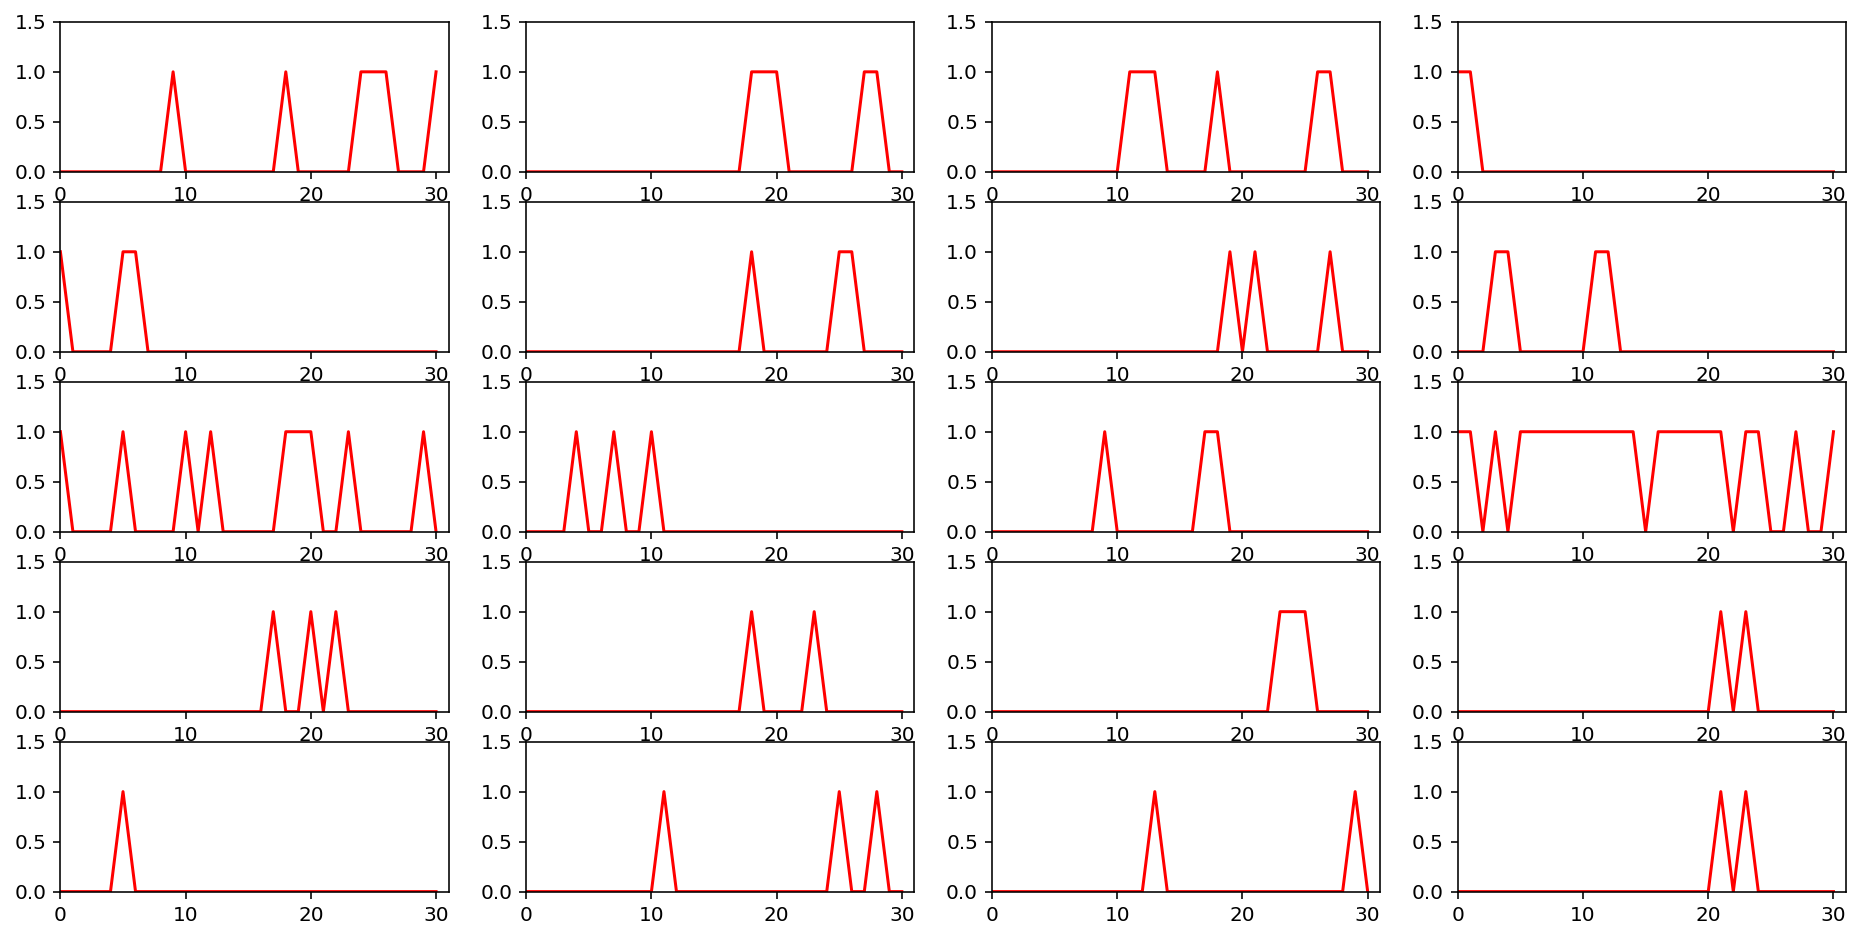

In [196]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(16,8),dpi=144)
for i in range(len(TF)):
    plt.subplot(5,4,i+1)
    plt.xlim(0,31)
    plt.ylim(0,1.5)
    plt.plot(TF[i],color="red")
plt.show()

In [87]:
# token_ids, segment_ids = tokenizer.encode(
#     pack[0][2], pack[1][2])
# token_ids, segment_ids = to_array([token_ids], [segment_ids])

# probas = model.predict([token_ids, segment_ids])[0]


In [5]:
#Query=jieba.analyse.extract_tags(combineStr, topK=20, withWeight=False, allowPOS=())


In [6]:
# for i in range(len(pack)-1):
#     if (len(pack[i][2])+len(pack[i+1][2])>=512):
#         pack[i][2]=pack[i][2][-128:]

#     token_ids, segment_ids = tokenizer.encode(
#         pack[i][2], pack[i+1][2])

#     token_ids, segment_ids = to_array([token_ids], [segment_ids])

#     probas = model.predict([token_ids, segment_ids])[0]
#     print(probas)
#     result.append(probas)


In [7]:
# token_ids = np.array([[token_ids]])
# segment_ids = np.array([[segment_ids]])
# token_ids = token_ids.reshape(1,  1, -1)
# segment_ids = segment_ids.reshape(1,  1, -1)


# probas = model.predict([token_ids, segment_ids])[0]


# token_ids, segment_ids = tokenizer.encode(
#     pack[0][2],
#     pack[1][2])
# token_ids, segment_ids = to_array([token_ids], [segment_ids])
# token_ids.shape
# probas = model.predict([token_ids, segment_ids])[0]
# probas


# for i in range(len(pack)-1):
#     pack[i].append(result[i][0])


# idxList = []
# lessThanHalf = []
# lessThanHalf.append('00:00:00')
# for i in range(1, len(pack)-1):
#     if(pack[i][3] < 0.2):
#         idxList.append(i)
#         lessThanHalf.append(pack[i][1][1])

# combineText = []

# S = pack[0][2]
# for i in range(len(pack)-1):

#     token_testId, Seg_testId = tokenizer.encode(pack[i][2], pack[i+1][2])
#     token_testId, Seg_testId = to_array([token_testId], [Seg_testId])
#     result = model.predict([token_testId, Seg_testId])[0][0]
#     # print(pack[i][2])
#     if(result > 0.5):
#         S += pack[i+1][2]

#     else:
#         S += pack[i+1][2]
#         combineText.append(S)
#         S = ""

# wst=[]

# wst = ws(
#     combineText,
# )
# del ws


# for sentence in combineText:
#     seq_list=jieba.lcut(sentence)
#     wst.append(seq_list)

# seq_list = ws(
#     combineText,
#      sentence_segmentation = True, # To consider delimiters
#      segment_delimiter_set = {",", "。", ":", "?", "!", ";"}), # This is the defualt set of delimiters
#     # recommend_dictionary = dictionary1, # words in this dictionary are encouraged
#     # coerce_dictionary = dictionary2, # words in this dictionary are forced

# TF=np.zeros((np.shape(wst)[0],20))


# for i in range(len(Query)):
#     for j in range(len(wst)):
#         for k in range(len(wst[j])):
#             if(Query[i] == wst[j][k]):
#                 TF[j][i]= 1
#                 continue

# keyWord=[]
# deliver=[]
# for i in TF:
#     for j in range(len(i)):
#         if(i[j]):
#             deliver.append(Query[j])
#     keyWord.append(deliver)
#     deliver=[]
# finalResult=[]
# tmpProcess=[]
# time=[]

# for i in range(len(combineText)):
#     tmpProcess.append(lessThanHalf[i])
#     tmpProcess.append(lessThanHalf[i+1])
#     tmpProcess.append(combineText[i])
#     tmpProcess.append(keyWord[i])
#     finalResult.append(tmpProcess)
#     tmpProcess=[]


In [8]:
TF


array([[1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
        1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [9]:
# S = combineText[0]
# combineText_1=[]
# for i in range(len(combineText)-1):

#     token_testId, Seg_testId = tokenizer.encode(combineText[i], combineText[i+1])
#     token_testId, Seg_testId = to_array([token_testId], [Seg_testId])
#     result = (model.predict([token_testId, Seg_testId])[0][0])
#     print(result)
# if(result > 0.01):
#     S += combineText[i+1]

# else:
#     S += combineText[i+1]
#     print(S)
#     combineText_1.append(S)


In [10]:
for i in range(len(Query)):
    for j in range(len(wst)):
        for k in range(len(wst[j])):
            if(Query[i] == wst[j][k]):
                TF[j][i] = 1
                continue


In [11]:
wst


[['核能',
  '發電',
  '到底',
  '是不是',
  '一個',
  '安全',
  '的',
  '技術',
  '呢',
  '在',
  '核災',
  '之',
  '後',
  '世界',
  '各國',
  '的',
  '核電',
  '發展',
  '又',
  '是',
  '如何',
  '呢',
  '廢核',
  '是',
  '國際',
  '趨勢',
  '嗎',
  '今天',
  '我們',
  '透過',
  '重啟',
  '核四',
  '公投',
  '來',
  '聊聊',
  '核電',
  '究竟',
  '安',
  '不',
  '安全',
  '嗎',
  'hello',
  ' ',
  ' ',
  '大家',
  '好',
  '我',
  '是',
  '自己',
  '換',
  '回到',
  '2021',
  '公投',
  '只能',
  '哦',
  '這是',
  '這個',
  '系列',
  '的',
  '第',
  '4',
  '集'],
 ['那', '我們', '在', '前', '幾天', '已經', '談過', '公投', '要', '不要', '綁大選'],
 ['藻礁',
  '公投',
  '還有萊豬',
  '公投',
  '的',
  '3',
  '個',
  '議題',
  '那',
  '如果',
  '你',
  '還沒看',
  '完歡',
  '迎',
  '你',
  '有',
  '看',
  '完',
  '今天',
  '的',
  '影片',
  '之',
  '後',
  '呢',
  '回去',
  '看一看',
  '那',
  '今天',
  '這',
  '一集',
  '是',
  '第',
  '4',
  '集',
  '我們',
  '要',
  '來',
  '討論',
  '的',
  '是',
  '第十七',
  '案重',
  '啟核',
  '四',
  '公投',
  '不過',
  '我們',
  '發現',
  '這個',
  '議題',
  '比',
  '想像中',
  '還要',
  '複',
  '雜',
  '很多'],
 ['我們', '必須', '要', '先', '弄清楚',

In [12]:
# dataString = []
# for i in range(len(idxList)):
#     dataString.append(pack[i][2])


In [13]:
Str = []
a = ''
b = 0
k = 0
for i in range(len(idxList)):
    if(i == idxList[k]):
        for j in range(b, i+1):
            a += pack[j][2]
        Str.append(a)
        k += 1
        a = ''
        b = i+1


In [14]:
Str


['核能發電到底是不是一個安全的技術呢在核災之後世界各國的核電發展又是如何呢廢核是國際趨勢嗎今天我們透過重啟核四公投來聊聊核電究竟安不安全嗎hello  大家好我是自己換回到2021公投只能哦',
 '這是這個系列的第4集']

In [65]:
combineText


['核能發電到底是不是一個安全的技術呢在核災之後世界各國的核電發展又是如何呢廢核是國際趨勢嗎今天我們透過重啟核四公投來聊聊核電究竟安不安全嗎hello  大家好我是自己換回到2021公投只能哦這是這個系列的第4集',
 '那我們在前幾天已經談過公投要不要綁大選',
 '藻礁公投還有萊豬公投的3個議題那如果你還沒看完歡迎你有看完今天的影片之後呢回去看一看那今天這一集是第4集我們要來討論的是第十七案重啟核四公投不過我們發現這個議題比想像中還要複雜很多',
 '我們必須要先弄清楚許多關於核能還有盒子的資訊',
 '才有辦法進入後續的討論所以這個主題呢我們會切分成上下兩集今天這一集我們會先來跟大家介紹核電廠揪竟安全過去的核災是怎麼回事也會聊到國際合的趨勢以及臺灣的核能發展現況那明天我們就會正式進入這一次核四公投的正反意見討論  當然照慣例哦在開始之前呢還是要先進一段工商服務時間臺灣第一場專門為youtube影音創作者舉辦',
 '年會fip即將登場嘍不然你是剛踏入youtube圈還再努力殺出重圍或者是已經有點成果正在思考變現或其他問題的創作者這場年會都會幫助你突破困境明確的知道下一步要怎麼走這種年會由臺灣新媒體影音創作者協會主辦喔',
 '串聯了多位頂尖創作者一起分享他們在內容策略個人發展影音趨勢以及商業洞察的經驗和觀點除此之外呢',
 '協會還邀請到youtube官方代表和ip為大家提供最準確的平臺動向和建議那如果你還沒創作者但正在準備入行或者是有興趣了解當然也能參加  而像年會呢將在2022年的1月10日登場除了現場席位呢也有線上影片票可以讓大家遠端參與目前優惠票種自然熱烈的範疇當中那因為數量有限所以有幸確認請點擊下方的諮詢連接了解更詳細的活動內容後速速報名他要討論合適',
 '我們必須要先了解一下核能電廠是怎麼運作的核能發電廠的發力原理呢是透過引發核分裂連鎖反應釋放的龐大能量來燒水再透過發電機把這個能量轉化成電力最後再透過冷卻水把多餘的廢熱排掉那目前世界上面多數的核電廠使用的燃料棒是濃度三到5倍爾見的鈾235來發電而經過長時間的反應之後呢燃料棒就會變成帶有放射性的核廢料那這些核廢料該怎麼處理呢一般來說核廢料會依照放射性的強度區分成高階核廢料還有低階核廢料兩大類高階核廢料指的是用過的燃料棒而低階核廢料通常指的是在輻射場所使用產生的廢棄物而這些廢棄物呢不一定都會被輻射污染

In [68]:
bb


['核能發電到底是不是一個安全的技術呢在核災之後世界各國的核電發展又是如何呢廢核是國際趨勢嗎今天我們透過重啟核四公投來聊聊核電究竟安不安全嗎hello  大家好我是自己換回到2021公投只能哦',
 '這是這個系列的第4集',
 '那我們在前幾天已經談過公投要不要綁大選藻礁公投還有萊豬公投的3個議題那如果你還沒看完歡迎你有看完今天的影片之後呢回去看一看那今天這一集是第4集我們要來討論的是第十七案重啟核四公投',
 '不過我們發現這個議題比想像中還要複雜很多我們必須要先弄清楚許多關於核能',
 '還有盒子的資訊才有辦法進入後續的討論所以這個主題呢我們會切分成上下兩集今天這一集我們會先來跟大家介紹核電廠揪竟安全過去的核災是怎麼回事也會聊到國際合的趨勢以及臺灣的核能發展現況那明天我們就會正式進入這一次核四公投的正反意見討論  當然照慣例哦在開始之前呢還是要先進一段工商服務時間',
 '臺灣第一場專門為youtube影音創作者舉辦年會fip即將登場嘍不然你是剛踏入youtube圈還再努力殺出重圍或者是已經有點成果正在思考變現或其他問題的創作者這場年會都會幫助你突破困境明確的知道下一步要怎麼走',
 '這種年會由臺灣新媒體影音創作者協會主辦喔串聯了多位頂尖創作者一起分享他們在內容策略個人發展影音趨勢以及商業洞察的經驗和觀點',
 '除此之外呢協會還邀請到youtube官方代表和ip為大家提供最準確的平臺動向和建議那如果你還沒創作者但正在準備入行或者是有興趣了解當然也能參加  而像年會呢將在2022年的1月10日登場除了現場席位呢也有線上影片票可以讓大家遠端參與目前優惠票種自然熱烈的範疇當中那因為數量有限所以有幸確認請點擊下方的諮詢連接了解更詳細的活動內容後速速報名他',
 '要討論合適我們必須要先了解一下核能電廠是怎麼運作的核能發電廠的發力原理呢是透過引發核分裂連鎖反應釋放的龐大能量來燒水再透過發電機把這個能量轉化成電力最後再透過冷卻水把多餘的廢熱排掉那目前世界上面多數的核電廠使用的燃料棒是濃度三到5倍爾見的鈾235來發電而經過長時間的反應之後呢燃料棒就會變成帶有放射性的核廢料那這些核廢料該怎麼處理呢一般來說核廢料會依照放射性的強度區分成高階核廢料還有低階核廢料兩大類高階核廢料指的是用過的燃料棒而低階核廢料通常指的是在輻射場所使用產生的廢棄物而這些廢棄物呢不一定都會被輻射污染

In [45]:
combineText


[]

In [16]:
combineStr = "".join(combineText)


In [50]:
combineText


[]

In [17]:
combineStr


'核能發電到底是不是一個安全的技術呢在核災之後世界各國的核電發展又是如何呢廢核是國際趨勢嗎今天我們透過重啟核四公投來聊聊核電究竟安不安全嗎hello  大家好我是自己換回到2021公投只能哦這是這個系列的第4集那我們在前幾天已經談過公投要不要綁大選藻礁公投還有萊豬公投的3個議題那如果你還沒看完歡迎你有看完今天的影片之後呢回去看一看那今天這一集是第4集我們要來討論的是第十七案重啟核四公投不過我們發現這個議題比想像中還要複雜很多我們必須要先弄清楚許多關於核能還有盒子的資訊才有辦法進入後續的討論所以這個主題呢我們會切分成上下兩集今天這一集我們會先來跟大家介紹核電廠揪竟安全過去的核災是怎麼回事也會聊到國際合的趨勢以及臺灣的核能發展現況那明天我們就會正式進入這一次核四公投的正反意見討論  當然照慣例哦在開始之前呢還是要先進一段工商服務時間臺灣第一場專門為youtube影音創作者舉辦年會fip即將登場嘍不然你是剛踏入youtube圈還再努力殺出重圍或者是已經有點成果正在思考變現或其他問題的創作者這場年會都會幫助你突破困境明確的知道下一步要怎麼走這種年會由臺灣新媒體影音創作者協會主辦喔串聯了多位頂尖創作者一起分享他們在內容策略個人發展影音趨勢以及商業洞察的經驗和觀點除此之外呢協會還邀請到youtube官方代表和ip為大家提供最準確的平臺動向和建議那如果你還沒創作者但正在準備入行或者是有興趣了解當然也能參加  而像年會呢將在2022年的1月10日登場除了現場席位呢也有線上影片票可以讓大家遠端參與目前優惠票種自然熱烈的範疇當中那因為數量有限所以有幸確認請點擊下方的諮詢連接了解更詳細的活動內容後速速報名他要討論合適我們必須要先了解一下核能電廠是怎麼運作的核能發電廠的發力原理呢是透過引發核分裂連鎖反應釋放的龐大能量來燒水再透過發電機把這個能量轉化成電力最後再透過冷卻水把多餘的廢熱排掉那目前世界上面多數的核電廠使用的燃料棒是濃度三到5倍爾見的鈾235來發電而經過長時間的反應之後呢燃料棒就會變成帶有放射性的核廢料那這些核廢料該怎麼處理呢一般來說核廢料會依照放射性的強度區分成高階核廢料還有低階核廢料兩大類高階核廢料指的是用過的燃料棒而低階核廢料通常指的是在輻射場所使用產生的廢棄物而這些廢棄物呢不一定都會被輻射污染但安全起降全部呢還出被算作是低階核廢料例如像是核電廠內使用過的衣物啊'

In [18]:
finalResult[0]


['00:00:00',
 '核能發電到底是不是一個安全的技術呢在核災之後世界各國的核電發展又是如何呢廢核是國際趨勢嗎今天我們透過重啟核四公投來聊聊核電究竟安不安全嗎hello  大家好我是自己換回到2021公投只能哦這是這個系列的第4集',
 ['我們', '公投', '透過', '這個', '核能', '發展', '趨勢', '核災', '核電', '核四']]

In [46]:
import numpy as np
x = np.array(finalResult)
for i in range(len(finalResult)):
    print(finalResult[i][2])
print(Str)


['我們', '公投', '透過', '這個', '核能', '發展', '趨勢', '核災', '核電', '核四']
['我們', '公投', '已經']
['我們', '公投', '這個', '討論']
['我們', '核能']
['我們', '公投', '這個', '討論', '怎麼', '核能', '發展', '趨勢', '核電廠', 'youtube', '影音', '作者', '核災', '核四']
['怎麼', 'youtube', '影音', '作者', '已經']
['發展', '趨勢', '影音', '作者']
['討論', 'youtube', '作者']
['我們', '廢料', '透過', '這個', '怎麼', '核能', '核電廠', '核廢料', '低階核']
['核電廠']
['核能發電到底是不是一個安全的技術呢在核災之後世界各國的核電發展又是如何呢廢核是國際趨勢嗎今天我們透過重啟核四公投來聊聊核電究竟安不安全嗎hello  大家好我是自己換回到2021公投只能哦', '這是這個系列的第4集']


In [49]:
TF


array([[1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
        1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [74]:
bb


['核能發電到底是不是一個安全的技術呢在核災之後世界各國的核電發展又是如何呢廢核是國際趨勢嗎今天我們透過重啟核四公投來聊聊核電究竟安不安全嗎hello  大家好我是自己換回到2021公投只能哦',
 '這是這個系列的第4集',
 '那我們在前幾天已經談過公投要不要綁大選藻礁公投還有萊豬公投的3個議題那如果你還沒看完歡迎你有看完今天的影片之後呢回去看一看那今天這一集是第4集我們要來討論的是第十七案重啟核四公投',
 '不過我們發現這個議題比想像中還要複雜很多我們必須要先弄清楚許多關於核能',
 '還有盒子的資訊才有辦法進入後續的討論所以這個主題呢我們會切分成上下兩集今天這一集我們會先來跟大家介紹核電廠揪竟安全過去的核災是怎麼回事也會聊到國際合的趨勢以及臺灣的核能發展現況那明天我們就會正式進入這一次核四公投的正反意見討論  當然照慣例哦在開始之前呢還是要先進一段工商服務時間',
 '臺灣第一場專門為youtube影音創作者舉辦年會fip即將登場嘍不然你是剛踏入youtube圈還再努力殺出重圍或者是已經有點成果正在思考變現或其他問題的創作者這場年會都會幫助你突破困境明確的知道下一步要怎麼走',
 '這種年會由臺灣新媒體影音創作者協會主辦喔串聯了多位頂尖創作者一起分享他們在內容策略個人發展影音趨勢以及商業洞察的經驗和觀點',
 '除此之外呢協會還邀請到youtube官方代表和ip為大家提供最準確的平臺動向和建議那如果你還沒創作者但正在準備入行或者是有興趣了解當然也能參加  而像年會呢將在2022年的1月10日登場除了現場席位呢也有線上影片票可以讓大家遠端參與目前優惠票種自然熱烈的範疇當中那因為數量有限所以有幸確認請點擊下方的諮詢連接了解更詳細的活動內容後速速報名他',
 '要討論合適我們必須要先了解一下核能電廠是怎麼運作的核能發電廠的發力原理呢是透過引發核分裂連鎖反應釋放的龐大能量來燒水再透過發電機把這個能量轉化成電力最後再透過冷卻水把多餘的廢熱排掉那目前世界上面多數的核電廠使用的燃料棒是濃度三到5倍爾見的鈾235來發電而經過長時間的反應之後呢燃料棒就會變成帶有放射性的核廢料那這些核廢料該怎麼處理呢一般來說核廢料會依照放射性的強度區分成高階核廢料還有低階核廢料兩大類高階核廢料指的是用過的燃料棒而低階核廢料通常指的是在輻射場所使用產生的廢棄物而這些廢棄物呢不一定都會被輻射污染

In [25]:
if pack[0][-1] >= 0.5:
    print(0)


0


In [31]:
aa


'還出被算作是低階核廢料例如像是核電廠內使用過的衣物啊'